# Hello, pytorch

![img](https://pytorch.org/tutorials/_static/pytorch-logo-dark.svg)


In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import torch
print(torch.__version__)

1.0.0


In [2]:
# numpy world

x = np.arange(16).reshape(4, 4)

print("X :\n%s\n" % x)
print("X.shape : %s\n" % (x.shape,))
print("add 5 :\n%s\n" % (x + 5))
print("X*X^T  :\n%s\n" % np.dot(x, x.T))
print("mean over cols :\n%s\n" % (x.mean(axis=-1)))
print("cumsum of cols :\n%s\n" % (np.cumsum(x, axis=0)))

X :
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

X.shape : (4, 4)

add 5 :
[[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]

X*X^T  :
[[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]

mean over cols :
[ 1.5  5.5  9.5 13.5]

cumsum of cols :
[[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]]



In [3]:
# pytorch world

x = np.arange(16).reshape(4, 4)

x = torch.tensor(x, dtype=torch.float32)  # or torch.arange(0,16).view(4,4)

print("X :\n%s" % x)
print("X.shape : %s\n" % (x.shape,))
print("add 5 :\n%s" % (x + 5))
print("X*X^T  :\n%s" % torch.matmul(x, x.transpose(1, 0)))  # short: x.mm(x.t())
print("mean over cols :\n%s" % torch.mean(x, dim=-1))
print("cumsum of cols :\n%s" % torch.cumsum(x, dim=0))

X :
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])
X.shape : torch.Size([4, 4])

add 5 :
tensor([[ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.],
        [17., 18., 19., 20.]])
X*X^T  :
tensor([[ 14.,  38.,  62.,  86.],
        [ 38., 126., 214., 302.],
        [ 62., 214., 366., 518.],
        [ 86., 302., 518., 734.]])
mean over cols :
tensor([ 1.5000,  5.5000,  9.5000, 13.5000])
cumsum of cols :
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.]])


## Задание 1.
$$ x(t) = t - 1.5 * cos( 15 t) $$
$$ y(t) = t - 1.5 * sin( 16 t) $$


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

t = torch.linspace(-10, 10, steps=10000)

# compute x(t) and y(t) as defined above
x =  t - 1.5 * torch.cos(15 * t)
y ### write down your code

plt.plot(x.numpy(), y.numpy())

NameError: name 'y' is not defined

## Задание 2.

## Автоматическое диффеенцирование

Любой уважающий себя DL-фреймворк умеет считать производные сложных функций, используя **алгоритм обратного распространения ошибки**


Что для этого требуется:
* Создавая тензор, Вы помечаете его как требующий подсчета градиента `requires_grad`:
    * __```torch.zeros(5, requires_grad=True)```__
    * torch.tensor(np.arange(5), dtype=torch.float32, requires_grad=True)
* Определите функцию, которую нужно продифференцировать `loss = arbitrary_function(a)`
* Вызовите `loss.backward()`
* Значения градиентов хранятся в аттрибуте```a.grads```

Пример:__ Давайте обучим линейную регрессию, используя pytorch:

Загрузим датасет с ценами на недвижимость в Бостоне:

In [5]:
from sklearn.datasets import load_boston
boston = load_boston()

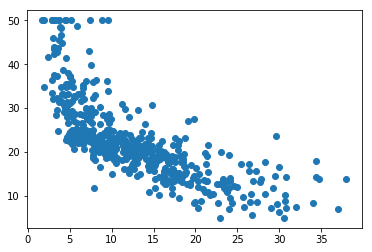

In [6]:
plt.scatter(boston.data[:, -1], boston.target)

In [7]:
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / 10, dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

In [8]:
y_pred = w * x + b
loss = torch.mean((y_pred - y)**2)

# propagete gradients
loss.backward()

Посмотрим на значения градиента

In [9]:
print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-47.3514])
dL/db = 
 tensor([-45.0656])


Посмотрим на результаты в процессе обучения:

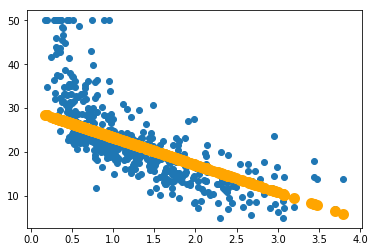

loss =  44.59417


In [10]:
from IPython.display import clear_output

for i in range(100):

    y_pred = w * x + b
    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    w.data -= 0.05 * w.grad.data
    b.data -= 0.05 * b.grad.data

    # zero gradients
    w.grad.data.zero_()
    b.grad.data.zero_()

    # the rest of code is just bells and whistles
    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break

## Задание 3.

In [11]:
candy_data = pd.read_csv('candy-data.csv')
candy_data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [29]:
feature_names = ['fruity', 'caramel', 'peanutyalmondy', 'nougat', 
                 'crispedricewafer', 'hard', 'bar', 'pluribus', 
                 'sugarpercent', 'pricepercent', 'winpercent']

X = candy_data[feature_names].to_numpy()
y = candy_data.chocolate.to_numpy()

In [33]:
from torch import nn
import torch.nn.functional as F

In [34]:
# create a network `that stacks layers on top of each other
model = nn.Sequential()

# add first "dense" layer with 784 input units and 1 output unit.
model.add_module('l1', nn.Linear(11, 2))

# add softmax activation for probabilities. Normalize over axis 1
# note: layer names must be unique
model.add_module('l2', nn.Sigmoid())

In [35]:
print("Weight shapes:", [w.shape for w in model.parameters()])

Weight shapes: [torch.Size([2, 11]), torch.Size([2])]


In [36]:
X_train, y_train = X[:-20, :], y[:-20]
X_test, y_test = X[-20:, :], y[-20:]

In [49]:
# create dummy data with 3 samples and 11 features
x = torch.tensor(X_train[:3], dtype=torch.float32)
y = torch.tensor(y_train[:3], dtype=torch.float32)
print(x.shape)
# compute outputs given inputs, both are variables
y_predicted = model(x)[:, 0]

y_predicted  # display what we've got

torch.Size([3, 11])


tensor([0.8230, 0.7012, 0.4872], grad_fn=<SelectBackward>)

Определим функцию потерь для нашей модели:

Бинарная кросс-энтропия (aka logloss, negative llh):
$$ L = {1 \over N} \underset{X_i,y_i} \sum - [  y_i \cdot log P(y_i | X_i) + (1-y_i) \cdot log (1-P(y_i | X_i)) ]$$
Имплементируйте функцию потерь кросс-энтропию __врчную__ без использования `torch.nn.functional`. 


In [50]:
crossentropy = - (y * torch.log(y_predicted) + (1 - y) * torch.log(1 - y_predicted))
# YOUR CODE
loss =  torch.mean(crossentropy)
print(loss)
# YOUR CODE

assert tuple(crossentropy.size()) == (
    3,), "Crossentropy must be a vector with element per sample"
assert tuple(loss.size()) == tuple(
), "Loss must be scalar. Did you forget the mean/sum?"
assert loss.data.numpy() > 0, "Crossentropy must non-negative, zero only for perfect prediction"
assert loss.data.numpy() <= 10, "Loss is too large even for untrained model. Please double-check it."

tensor(0.4059, grad_fn=<MeanBackward1>)


In [51]:
opt = torch.optim.Adam(model.parameters(), lr=0.01)

In [52]:

# here's how it's used:
loss.backward()      # add new gradients
opt.step()           # change weights
opt.zero_grad()      # clear gradients

In [53]:
# dispose of old variables to avoid bugs later
del x, y, y_predicted, loss

In [57]:
# create network again just in case
model = nn.Sequential()
model.add_module('first', nn.Linear(11, 2))
model.add_module('second', nn.Sigmoid())

opt = torch.optim.Adam(model.parameters(), lr=1e-3)

In [62]:
history = []

for i in range(100):

    # sample 256 random images
    ix = np.random.randint(0, len(X_train), 16)
    x_batch = torch.tensor(X_train[ix], dtype=torch.float32)
    y_batch = torch.tensor(y_train[ix], dtype=torch.float32)
    # predict probabilities
    y_predicted = # YOUR CODE

    assert y_predicted.dim(
    ) == 1, "did you forget to select first column with [:, 0]"

    # compute loss, just like before
    loss =  # YOUR CODE

    # compute gradients
    <YOUR CODE >

    # Adam step
    <YOUR CODE >

    # here's how it's used:
    # clear gradients
#     <YOUR CODE >
    
    history.append(loss.data.numpy())

    if i % 10 == 0:
        print("step #%i | mean loss = %.3f" % (i, np.mean(history[-10:])))

step #0 | mean loss = 0.355
step #10 | mean loss = 0.396
step #20 | mean loss = 0.410
step #30 | mean loss = 0.417
step #40 | mean loss = 0.340
step #50 | mean loss = 0.371
step #60 | mean loss = 0.348
step #70 | mean loss = 0.343
step #80 | mean loss = 0.396
step #90 | mean loss = 0.365


In [63]:
# use your model to predict classes (0 or 1) for all test samples
x = torch.tensor(X_test, dtype=torch.float32)
y = torch.tensor(y_test, dtype=torch.float32)

# compute outputs given inputs, both are variables
# y_predicted  # display what we've got
# predicted_y_test =  # YOUR CODE

assert isinstance(predicted_y_test, np.ndarray), "please return np array, not %s" % type(
    predicted_y_test)
assert predicted_y_test.shape == y_test.shape, "please predict one class for each test sample"
assert np.in1d(predicted_y_test, y_test).all(), "please predict class indexes"

accuracy = np.mean(predicted_y_test == y_test)

print("Test accuracy: %.5f" % accuracy)
assert accuracy > 0.75, "try training longer"

[1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1]
Test accuracy: 0.85000
